In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\programmes\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
df = pd.read_excel('volcano.xlsx')
N = df.size

In [3]:
df.head(5)

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211001,Larderello,Italy,Explosion crater(s),Eruption Observed,1282 CE,Mediterranean and Western Asia,Italy,43.250,10.87,500,No Data (checked),Subduction zone / Continental crust (>25 km)


In [4]:
df.columns

Index(['Volcano Number', 'Volcano Name', 'Country', 'Primary Volcano Type',
       'Activity Evidence', 'Last Known Eruption', 'Region', 'Subregion',
       'Latitude', 'Longitude', 'Elevation (m)', 'Dominant Rock Type',
       'Tectonic Setting'],
      dtype='object')

### Elevation

In [5]:
elevations = df['Elevation (m)']

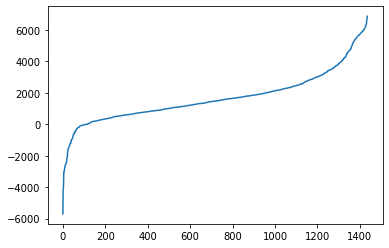

In [6]:
plt.plot(range(len(elevations)), np.sort(elevations))

[]

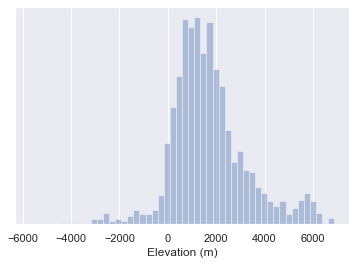

In [7]:
sns.set()
ax = sns.distplot(elevations, bins = 50, kde = False)
ax.set_yticks([])

In [25]:
height_mean = np.mean(elevations)
height_median = np.median(elevations)
height_max = np.max(elevations)
heigth_min = np.min(elevations)

### Erruptions

In [188]:
last_err = df['Last Known Eruption']
last_err_clean = last_err[last_err != 'Unknown']
old_perc = len(last_err_clean)/len(last_err) * 100
last_err_clean = [x.split(' ') for x in last_err_clean]
oldness = np.array([2018+int(x[0]) if x[1] == 'BCE' else 2018-int(x[0]) for x in last_err_clean])
oldest = np.max(oldness)
old_mean = np.mean(oldness)
old_median = np.median(oldness)

In [189]:
err_ev = df['Activity Evidence']
err_poss_activity_info = ', '.join(err_ev.unique())

Text(0.5, 0, 'last known eruption age younger than 200')

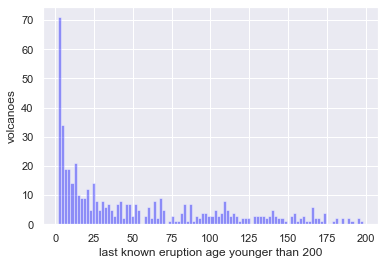

In [190]:
sns.set()
sns.distplot(t, bins = 100, kde = False, color = 'blue')
plt.ylabel('volcanoes')
plt.xlabel('last known eruption age younger than 200')

### Position

In [191]:
position_info = df[['Country', 'Region', 'Subregion', 'Latitude', 'Longitude']]
num_countries = position_info['Country'].unique().shape[0]
num_regions = position_info['Region'].unique().shape[0]
num_subregions = position_info['Subregion'].unique().shape[0]

### Volcano properties

In [201]:
prop = df[['Primary Volcano Type', 'Dominant Rock Type', 'Tectonic Setting']]
num_vol_type = prop['Primary Volcano Type'].unique().shape[0]
num_rock_type = prop['Dominant Rock Type'].unique().shape[0]
num_tec_type = prop[ 'Tectonic Setting'].unique().shape[0]

In [202]:
prop['Primary Volcano Type'].unique()

array(['Maar(s)', 'Lava dome(s)', 'Pyroclastic cone(s)',
       'Explosion crater(s)', 'Caldera', 'Stratovolcano', 'Complex',
       'Submarine', 'Stratovolcano(es)', 'Shield', 'Shield(s)',
       'Lava dome', 'Lava cone(s)', 'Volcanic field', 'Volcanic field(s)',
       'Fissure vent(s)', 'Fissure vent', 'Caldera(s)',
       'Pyroclastic cone', 'Tuff cone(s)', 'Tuff cone',
       'Pyroclastic shield', 'Submarine(es)', 'Maar', 'Compound',
       'Lava cone', 'Stratovolcano?', 'Unknown', 'Crater rows',
       'Complex(es)', 'Cone(s)', 'Tuff ring(s)', 'Subglacial'],
      dtype=object)

In [273]:
rockTypes = prop['Dominant Rock Type'].dropna().unique()

In [274]:
rockTypes

array(['Foidite', 'Basalt / Picro-Basalt',
       'Trachybasalt / Tephrite Basanite', 'No Data (checked)',
       'Trachyte / Trachydacite', 'Phono-tephrite /  Tephri-phonolite',
       'Phonolite', 'Trachyandesite / Basaltic Trachyandesite',
       'Andesite / Basaltic Andesite', 'Rhyolite', 'Dacite'], dtype=object)

In [275]:
x = []
y = []
for i in rockTypes:
    n = len(prop[prop['Dominant Rock Type'] == i])
    x.append(i)
    y.append(n)

In [296]:
x[8]

'Andesite / Basaltic Andesite'

Text(0.5, 0, 'rock types')

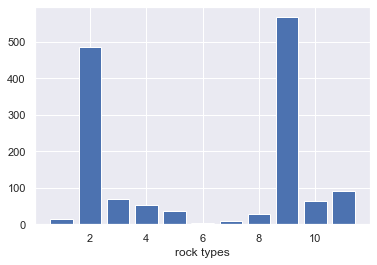

In [295]:
ax = plt.bar(1+np.arange(11), y)
plt.xlabel('rock types')

In [195]:
prop['Tectonic Setting'].unique()

array(['Rift zone / Continental crust (>25 km)',
       'Intraplate / Continental crust (>25 km)',
       'Subduction zone / Continental crust (>25 km)',
       'Rift zone / Oceanic crust (< 15 km)',
       'Rift zone / Intermediate crust (15-25 km)',
       'Intraplate / Oceanic crust (< 15 km)',
       'Subduction zone / Oceanic crust (< 15 km)',
       'Subduction zone / Crustal thickness unknown',
       'Subduction zone / Intermediate crust (15-25 km)', 'Unknown',
       'Intraplate / Intermediate crust (15-25 km)'], dtype=object)

In [305]:
rz= 0
intr = 0
sz = 0
for i in prop['Tectonic Setting'].dropna():
    if i[0] == 'R':
        rz+=1
    elif i[0] == 'S':
        sz+=1
    elif i[0] == 'I':
        intr+=1
print('r: ' + str(rz) + ', i: ' + str(intr) + ' s: ' + str(sz))

r: 240, i: 182 s: 1008


<BarContainer object of 3 artists>

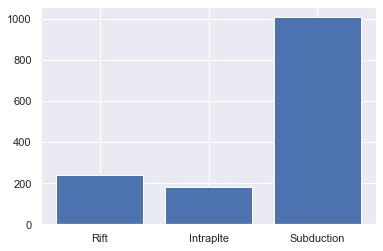

In [306]:
plt.bar(['Rift', 'Intraplte', 'Subduction'], [rz, intr, sz])

In [196]:
temp = prop[prop['Primary Volcano Type'] != 'Unkown']
temp = temp[temp['Dominant Rock Type'] != 'No Data (checked)']
temp = temp[temp['Tectonic Setting'] != 'Unknown']
temp = temp.dropna()

In [197]:
types = temp['Primary Volcano Type'].unique()

In [198]:
temp['Primary Volcano Type']

0                   Maar(s)
1              Lava dome(s)
2       Pyroclastic cone(s)
3       Pyroclastic cone(s)
5                   Caldera
               ...         
1430          Stratovolcano
1431          Stratovolcano
1432          Stratovolcano
1433              Submarine
1434                 Shield
Name: Primary Volcano Type, Length: 1367, dtype: object

### Cell for printing findings

In [199]:
print("""There are {} volcanoes that are referenced in the dataset."""
     .format(N)
    )

print(
"""   The oldest erruption happened {} years ago({}),
the mean difference in year with today is {}, the median {}.
This information is available for {}% of the volcanoes.
There also is activity information.
The possible values are {}."""
    .format(oldest, str(oldest-2020)+' BCE', int(old_mean), int(old_median), int(old_perc), err_poss_activity_info)
)

print(
"""   Height is given with respect to sea level.
The mean heigth is {}, while the median height is {}.
The maximum heigth is {} while the minimum is {}."""
    .format(int(height_mean), int(height_median), int(height_max), int(heigth_min)))

print(
"""   The volcanoes are shattered accross {} countries ({} regions and {} subregions)."""
    .format(num_countries, num_regions, num_subregions)
)

print(
"""   The volcanoes have 3 additional properties:
'Primary Volcano Type' ({} types), 'Dominant Rock Type' ({} types) and 'Tectonic Setting' ({} types).

""".format(num_vol_type, num_rock_type, num_tec_type))

There are 18668 volcanoes that are referenced in the dataset.
   The oldest erruption happened 12468 years ago(10448 BCE),
the mean difference in year with today is 1250, the median 112.
This information is available for 60% of the volcanoes.
There also is activity information.
The possible values are Eruption Dated, Evidence Credible, Eruption Observed, Evidence Uncertain, Unrest / Holocene.
   Height is given with respect to sea level.
The mean heigth is 1688, while the median height is 1484.
The maximum heigth is 6879 while the minimum is -5700.
   The volcanoes are shattered accross 95 countries (19 regions and 107 subregions).
   The volcanoes have 3 additional properties:
'Primary Volcano Type' (33 types), 'Dominant Rock Type' (11 types) and 'Tectonic Setting' (11 types).


